## Churn Analysis

In [1]:
# Import all the necessory libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pathlib import Path

import matplotlib.pyplot as plt#visualization
%matplotlib inline

import seaborn as sns#visualization
import plotly.offline as py#visualization
import plotly.graph_objs as go#visualization
import warnings
warnings.filterwarnings("ignore")

## Import Data

In [ ]:
# import the ecom data
DATA_PATH = Path('../data/sample/ecommerce.csv')
ecom = pd.read_csv(DATA_PATH)


## Data Overview

In [3]:
# data overview
ecom.head().T

,0,1,2,3,4
CustomerID,50001,50002,50003,50004,50005
Churn,1,1,1,1,1
Tenure,4.0,NaN,NaN,0.0,0.0
PreferredLoginDevice,Mobile Phone,Phone,Phone,Phone,Phone
CityTier,3,1,1,3,1
WarehouseToHome,6.0,8.0,30.0,15.0,12.0
PreferredPaymentMode,Debit Card,UPI,Debit Card,Debit Card,CC
Gender,Female,Male,Male,Male,Male
HourSpendOnApp,3.0,3.0,2.0,2.0,NaN
NumberOfDeviceRegistered,3,4,4,4,3


In [4]:
ecom.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.5,54222.75,55630.0
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.0,0.00,1.0
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.0,16.00,61.0
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.0,3.00,3.0
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.0,20.00,127.0
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.0,3.00,5.0
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.0,4.00,6.0
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.0,4.00,5.0
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.0,6.00,22.0
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.0,1.00,1.0


In [5]:
# data information
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [6]:
# check for the missing values
ecom.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

### Data Cleaning

In [7]:
# after looking at the data, we have found that there are spaces instad of missing value
# replacing " " or any missing values with np.NaN
ecom = ecom.replace(" ", np.nan)

In [8]:
# check for the missing values
ecom.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

#### We will use the median to fill in the missing values to avoid reducing the sample size and introducing bias that could result from directly deleting the data.

In [9]:
# use the median to fill in the missing values

num_cols = ["Tenure","WarehouseToHome","HourSpendOnApp",
            "OrderAmountHikeFromlastYear","CouponUsed","OrderCount","DaySinceLastOrder"]

for c in num_cols:
    ecom[c] = ecom[c].fillna(ecom[c].median())



In [10]:
#check the final data
ecom.head().T

,0,1,2,3,4
CustomerID,50001,50002,50003,50004,50005
Churn,1,1,1,1,1
Tenure,4.0,9.0,9.0,0.0,0.0
PreferredLoginDevice,Mobile Phone,Phone,Phone,Phone,Phone
CityTier,3,1,1,3,1
WarehouseToHome,6.0,8.0,30.0,15.0,12.0
PreferredPaymentMode,Debit Card,UPI,Debit Card,Debit Card,CC
Gender,Female,Male,Male,Male,Male
HourSpendOnApp,3.0,3.0,2.0,2.0,3.0
NumberOfDeviceRegistered,3,4,4,4,3


In [11]:
ecom.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

## plot

### 1- Customer Churn Analysis

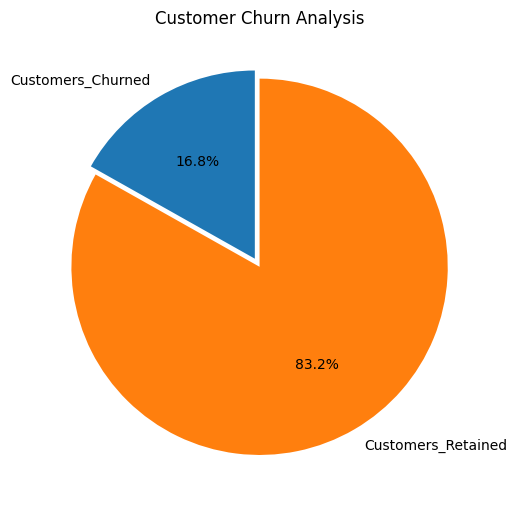

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

churn = int((ecom["Churn"]==1).sum())
ret   = int((ecom["Churn"]==0).sum())
labels = ["Customers_Churned","Customers_Retained"]
sizes  = [churn, ret]

plt.figure(figsize=(5.5,5.5))
plt.pie(sizes, labels=labels, autopct="%.1f%%", startangle=90, explode=(0.05,0))
plt.title("Customer Churn Analysis")
plt.tight_layout(); plt.show()


* 16.8% of customers have left (churned), while 83.2% are still using the service. Most customers stay loyal, but the churn rate is still high enough to worry about.

### 2-Churn Rate by Gender

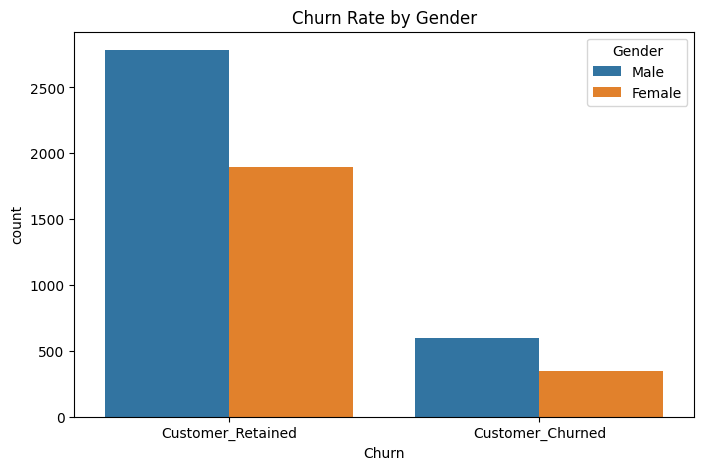

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(data=ecom, x="Churn", hue="Gender")

plt.xticks([0,1], ["Customer_Retained","Customer_Churned"])
plt.ylabel("count")
plt.title("Churn Rate by Gender")
plt.legend(title="Gender")
plt.show()


* Male customers are more in total number and more of them churn compared to females. Female customers are fewer overall, but their churn pattern is not very different from males.

### 3- Churn Rate by Tenure Group (months)

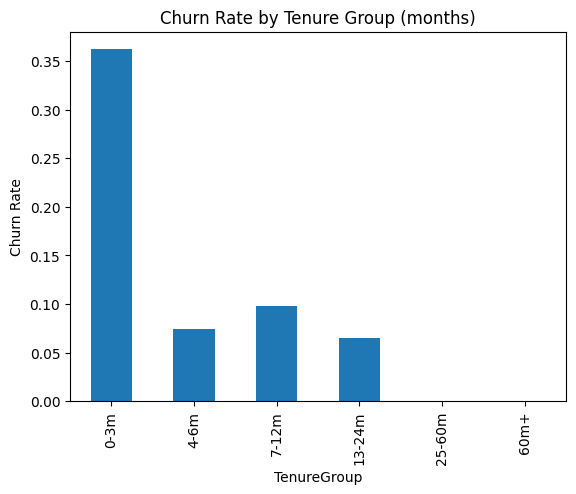

In [14]:

bins = [0, 3, 6, 12, 24, 60, float("inf")]
labels = ["0-3m","4-6m","7-12m","13-24m","25-60m","60m+"]
ecom["TenureGroup"] = pd.cut(ecom["Tenure"], bins=bins, labels=labels)
stat = ecom.groupby("TenureGroup")["Churn"].mean()


stat.plot(kind="bar")
plt.ylabel("Churn Rate")
plt.title("Churn Rate by Tenure Group (months)")
plt.show()

* Customers with 0–3 months of usage have the highest churn rate (over 35%). The longer customers stay, the lower the churn rate. New customers are the most likely to leave, while long-term customers are much more loyal.

### 4-Churn Rate by Satisfaction Score

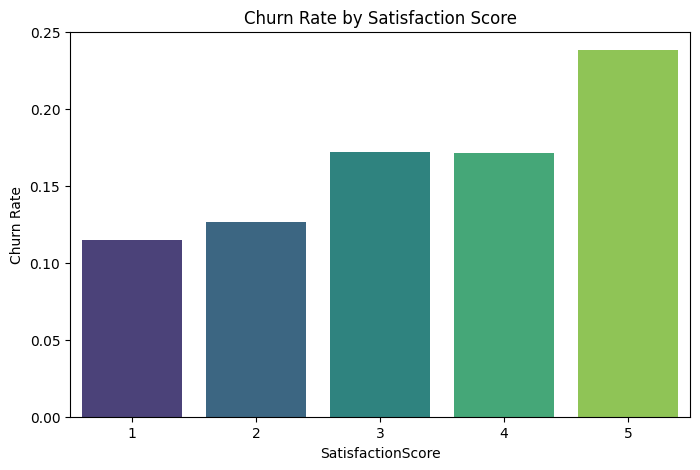

In [15]:

satis_churn = ecom.groupby("SatisfactionScore")["Churn"].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=satis_churn, x="SatisfactionScore", y="Churn", palette="viridis")
plt.ylabel("Churn Rate")
plt.title("Churn Rate by Satisfaction Score")
plt.show()


* It is surprising that customers with higher satisfaction scores also show higher churn rates. Customers who gave a score of 5 are leaving more than those who gave lower scores. This may mean there is a problem in how satisfaction is recorded, or customers have high expectations that are not met later.

### 5-Satisfaction Score Distribution by Churn

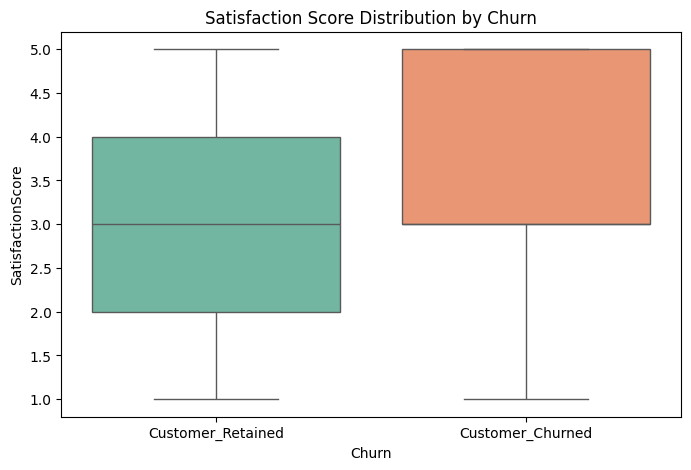

In [16]:

plt.figure(figsize=(8,5))
sns.boxplot(data=ecom, x="Churn", y="SatisfactionScore", palette="Set2")
plt.xticks([0,1], ["Customer_Retained","Customer_Churned"])
plt.title("Satisfaction Score Distribution by Churn")
plt.show()

* Retained customers usually have a middle score of 3, while churned customers are often in higher score ranges. This looks opposite to what we normally think, and it supports the idea that the satisfaction score may not be fully reliable.

### 6-Churn Rate by Complain

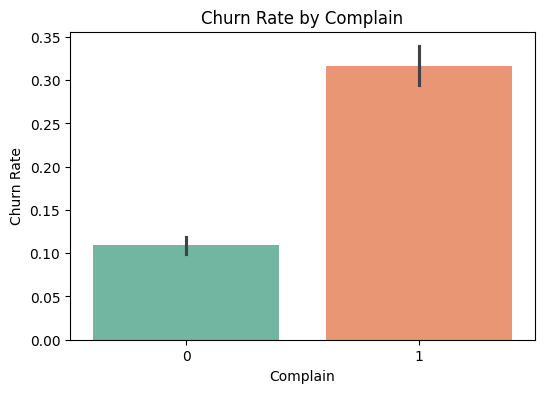

In [17]:

plt.figure(figsize=(6,4))
sns.barplot(data=ecom, x="Complain", y="Churn", palette="Set2")
plt.title("Churn Rate by Complain")
plt.ylabel("Churn Rate")
plt.show()



* Customers who made complaints have a churn rate above 30%, while customers with no complaints have only about 10% churn. Complaints are a very strong sign that a customer may soon leave.

# Churn Prediction with Machine Learning

## Pre-Process the Data

In [18]:
# check unique values in order to saprate data
ecom.nunique()

CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                  220
TenureGroup                       6
dtype: int64

In [19]:
# pre-processing modules from sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#customer id col
Id_col = ['customerID']

#Target columns
target_col = ["Churn"]

#categorical columns
# any columns which has more than 6 categories
cat_cols   = ecom.nunique()[ecom.nunique() < 10].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]

#numerical columns
# any columns which is not category, traget or ID
num_cols = [x for x in ecom.columns if x not in cat_cols + target_col + Id_col]

#Binary columns with 2 values
bin_cols   = ecom.nunique()[ecom.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

In [20]:
#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    ecom[i] = le.fit_transform(ecom[i])
    
#Duplicating columns for multi value columns
ecom = pd.get_dummies(data = ecom,columns = multi_cols)

In [21]:
#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(ecom[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

In [22]:
# check out scaled data
scaled

,CustomerID,Tenure,WarehouseToHome,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,-1.731743,-0.733989,-1.146379,1.852616,-1.301849,-0.385940,-0.681423,0.151436,-0.350105
1,-1.731128,-0.135704,-0.906721,1.078430,-0.187872,-0.924305,-0.681423,-1.249003,-1.142957
2,-1.730513,-0.135704,1.729519,0.691336,-0.466367,-0.924305,-0.681423,-0.408739,-1.163287
3,-1.729897,-1.212618,-0.067917,1.465523,2.040082,-0.924305,-0.681423,-0.408739,-0.878673
4,-1.729282,-1.212618,-0.427405,-0.469944,-1.301849,-0.385940,-0.681423,-0.408739,-0.959991
...,...,...,...,...,...,...,...,...,...
5625,1.729282,-0.016046,1.729519,0.691336,0.647610,-0.385940,-0.334079,-0.128651,-0.533071
5626,1.729897,0.342925,-0.307575,0.691336,0.090622,-0.385940,-0.334079,-0.408739,0.971315
5627,1.730513,-1.092961,-0.547234,-0.469944,1.483093,-0.385940,-0.334079,-0.128651,0.178463
5628,1.731128,1.539497,-0.786892,-0.082850,-0.187872,0.152425,-0.334079,1.271788,0.036156


In [23]:

ecom = ecom.drop(columns = num_cols,axis = 1)
ecom1 = ecom.merge(scaled,left_index=True,right_index=True,how = "left")

ecom1.head().T

,0,1,2,3,4
Churn,1,1,1,1,1
Gender,0,1,1,1,1
Complain,1,1,1,0,0
PreferredLoginDevice_Computer,False,False,False,False,False
PreferredLoginDevice_Mobile Phone,True,False,False,False,False
PreferredLoginDevice_Phone,False,True,True,True,True
CityTier_1,False,True,True,False,True
CityTier_2,False,False,False,False,False
CityTier_3,True,False,False,True,False
PreferredPaymentMode_CC,False,False,False,False,True


### Variable Summary & Co-relation metrix

In [24]:
# variable summary
summary = ecom.describe().transpose()
summary

,count,mean,std,min,25%,50%,75%,max
Churn,5630.0,0.168384,0.374240,0.0,0.0,0.0,0.0,1.0
Gender,5630.0,0.601066,0.489723,0.0,0.0,1.0,1.0,1.0
Complain,5630.0,0.284902,0.451408,0.0,0.0,0.0,1.0,1.0


In [25]:
#correlation
correlation = ecom.corr()
#tick labels
matrix_cols = correlation.columns.tolist()

In [26]:
#convert to array
corr_array  = np.array(correlation)

In [27]:
correlation


,Churn,Gender,Complain,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferredLoginDevice_Phone,CityTier_1,CityTier_2,CityTier_3,PreferredPaymentMode_CC,...,SatisfactionScore_5,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,TenureGroup_0-3m,TenureGroup_4-6m,TenureGroup_7-12m,TenureGroup_13-24m,TenureGroup_25-60m,TenureGroup_60m+
Churn,1.000000,0.029264,0.250188,0.051099,-0.111639,0.078916,-0.084946,0.016970,0.080395,0.028796,...,0.092442,-0.024934,-0.151024,0.180847,0.248242,-0.085770,-0.116875,-0.164387,-0.129070,-0.005998
Gender,0.029264,1.000000,-0.040269,0.015871,-0.039142,0.029915,0.015597,0.040314,-0.033878,0.013356,...,-0.007281,-0.009841,0.037225,-0.032308,0.031340,-0.020877,-0.006524,0.001022,-0.040040,-0.016360
Complain,0.250188,-0.040269,1.000000,-0.001327,-0.001381,0.003128,-0.000373,-0.013477,0.006318,0.007734,...,0.006264,0.007044,-0.003720,-0.001422,0.028553,-0.039947,-0.039631,-0.003543,0.003061,0.021116
PreferredLoginDevice_Computer,0.051099,0.015871,-0.001327,1.000000,-0.628201,-0.338271,0.004938,-0.012032,0.000189,0.015973,...,-0.038955,-0.028574,0.002643,0.019098,-0.014380,0.041862,0.021126,-0.014950,-0.040191,-0.008523
PreferredLoginDevice_Mobile Phone,-0.111639,-0.039142,-0.001381,-0.628201,1.000000,-0.519682,-0.099478,-0.027767,0.115118,-0.218463,...,0.015943,0.024368,0.027422,-0.048062,-0.010625,-0.004362,-0.029972,0.110510,0.102958,0.013567
PreferredLoginDevice_Phone,0.078916,0.029915,0.003128,-0.338271,-0.519682,1.000000,0.114895,0.046796,-0.139442,0.246691,...,0.023493,0.001904,-0.036069,0.037160,0.028642,-0.040692,0.013053,-0.117245,-0.080394,-0.007051
CityTier_1,-0.084946,0.015597,-0.000373,0.004938,-0.099478,0.114895,1.000000,-0.289547,-0.906911,0.099302,...,0.011736,-0.012690,0.017662,-0.009174,-0.014355,-0.035506,0.007104,0.028660,0.029959,-0.018210
CityTier_2,0.016970,0.040314,-0.013477,-0.012032,-0.027767,0.046796,-0.289547,1.000000,-0.140680,0.001082,...,-0.007988,-0.006000,0.052027,-0.051105,-0.002739,-0.041060,0.027097,0.013851,0.005296,-0.002825
CityTier_3,0.080395,-0.033878,0.006318,0.000189,0.115118,-0.139442,-0.906911,-0.140680,1.000000,-0.103191,...,-0.008624,0.015767,-0.041170,0.031985,0.016054,0.054800,-0.019276,-0.035742,-0.033320,0.020079
PreferredPaymentMode_CC,0.028796,0.013356,0.007734,0.015973,-0.218463,0.246691,0.099302,0.001082,-0.103191,1.000000,...,-0.024391,-0.002589,-0.009596,0.012262,-0.059424,-0.039441,0.081267,-0.081260,-0.049152,-0.003009


In [28]:
import plotly.graph_objs as go

# 假设 corr 是你的相关系数矩阵（DataFrame）
corr = ecom.corr(numeric_only=True)

trace = go.Heatmap(
    z=corr.values,
    x=corr.columns,
    y=corr.index,
    colorscale="Viridis",            # 确保是有效的颜色表名
    colorbar=dict(
        title=dict(
            text="Correlation",      # 标题文字
            side="right"             # 可选: "right" / "left" / "top" / "bottom"
        )
    )
)

fig = go.Figure(data=[trace])
fig.update_layout(
    title="Correlation Matrix for Variables",
    autosize=False,
    height=720,
    width=900
)
fig.show()


* The correlation matrix shows that most values are below 0.8. This means the variables are not redundant, and we can keep them for building the model.

## Model Building

In [30]:
# Import all the modules for machine learning models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score,recall_score,f1_score

In [32]:
#splitting train and test data 
train,test = train_test_split(ecom,test_size = .20 ,random_state = 0)

In [34]:
##seperating dependent and independent variables
cols    = [i for i in ecom.columns if i not in Id_col + target_col]
X_train = train[cols]
Y_train = train[target_col]
X_test  = test[cols]
Y_test  = test[target_col]

## Logistics Regression

In [35]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [36]:
# Predicting test set
y_pred = classifier.predict(X_test)

In [37]:
#Evaluating the Results
cm = confusion_matrix(Y_test, y_pred)
print("accuracy_score",accuracy_score(Y_test, y_pred))
print("precision_score",precision_score(Y_test, y_pred))
print("recall_score",recall_score(Y_test, y_pred))
print("f1_score",f1_score(Y_test, y_pred))

accuracy_score 0.8783303730017762
precision_score 0.711864406779661
recall_score 0.44919786096256686
f1_score 0.5508196721311476


Test Data Accuracy: 0.8783


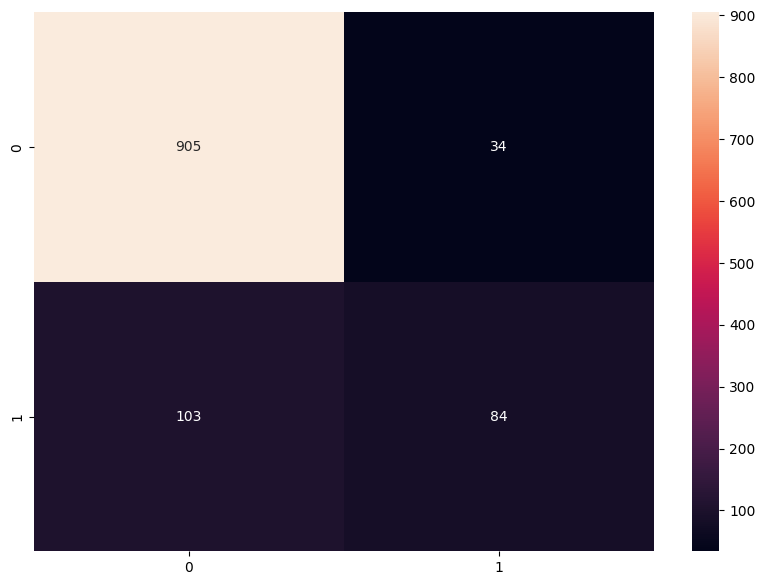

In [38]:
# Build the confusion matrix
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')
print("Test Data Accuracy: %.4f" %accuracy_score(Y_test, y_pred))

In [42]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=0)
dt_classifier.fit(X_train, Y_train)
y_pred_dt = dt_classifier.predict(X_test)

In [43]:
cm_dt = confusion_matrix(Y_test, y_pred_dt)
print("accuracy_score", accuracy_score(Y_test, y_pred_dt))
print("precision_score", precision_score(Y_test, y_pred_dt))
print("recall_score", recall_score(Y_test, y_pred_dt))
print("f1_score", f1_score(Y_test, y_pred_dt))

accuracy_score 0.9174067495559503
precision_score 0.7473684210526316
recall_score 0.7593582887700535
f1_score 0.753315649867374


Test Data Accuracy: 0.9174


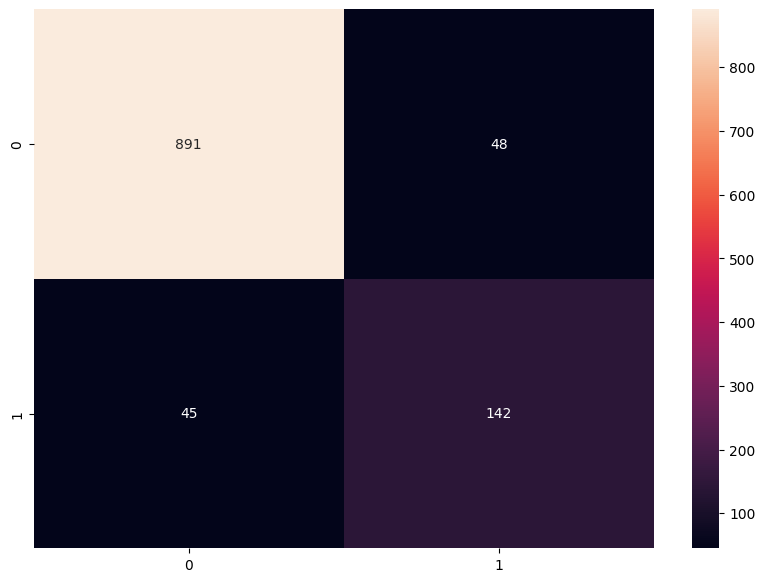

In [44]:
df_cm_dt = pd.DataFrame(cm_dt, index=[0, 1], columns=[0, 1])
plt.figure(figsize=(10,7))
sns.heatmap(df_cm_dt, annot=True, fmt='g')
print("Test Data Accuracy: %.4f" % accuracy_score(Y_test, y_pred_dt))